In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


import sys
import os

import pandas as pd

In [2]:
HEADERS = ['enc_type', 'n_states', 'sim_type', 'shots', 'optimizer', 'energy']

df = pd.DataFrame(columns = HEADERS)

In [3]:
diagonalized_values = np.array([
 #       [1,  -0.43658111],
        [2, -1.749160],
        [3, -2.045671], 
        [4, -2.1439810], 
        [5, -2.183592], 
        [6, -2.201568], 
        [7, -2.210416], 
        [8, -2.215038],
        [16, -2.221059]
]) 

In [4]:
for directory in ["../paper-data/noise-free"]:
    for filename in os.listdir(f"{directory}"):
        if "energies.npy" not in filename:
            continue 
            
        enc_type = ""
        if 'gray_code' in filename:
            enc_type = "Gray code"
        else:
            enc_type = "One-Hot"
            if 'original' in directory:
                enc_type += "-original"
                
        optimizer = 'SPSA' if 'SPSA' in filename else 'Nelder-Mead'
        sim_type = 'QASM' if 'qasm' in filename else 'Statevector'
        n_shots = 0
        n_states = int(filename.split("-")[3].split("_")[0])

        base_dict = {'enc_type' : enc_type,
                    'n_states' : n_states,
                    'sim_type' : sim_type,
                    'shots' : 10000,
                    'optimizer' : optimizer}                  

        data = np.load(f"{directory}/{filename}")

        for energy in data:
            next_dict = base_dict
            next_dict['energy'] = energy
            df = df.append(next_dict, ignore_index=True)

In [5]:
pd.set_option('display.max_rows', len(df))

In [6]:
df.groupby(['enc_type', 'sim_type', 'n_states', 'shots', 'optimizer']).describe()

energy                          \
                                                count      mean           std   
enc_type  sim_type    n_states shots optimizer                                  
Gray code QASM        2        10000 SPSA       100.0 -1.751833  5.157924e-02   
                      3        10000 SPSA       100.0 -2.036503  6.301197e-02   
                      4        10000 SPSA       100.0 -2.152996  7.468212e-02   
                      5        10000 SPSA       100.0 -2.149247  7.809877e-02   
                      6        10000 SPSA       100.0 -2.183521  9.197669e-02   
                      7        10000 SPSA       100.0 -2.184026  7.335736e-02   
                      8        10000 SPSA       100.0 -2.191698  9.079832e-02   
                      16       10000 SPSA       100.0 -2.154139  8.857369e-02   
          Statevector 2        10000 SPSA       100.0 -1.749160  0.000000e+00   
                      3        10000 SPSA       100.0 -2.045599  1.516537e-05   
                      4        10000 SPSA       100.0 -2.143980  7.908431e-07   
                      5        10000 SPSA       100.0 -2.183553  1.805920e-05   
                      6        10000 SPSA       100.0 -2.201531  1.806626e-05   
                      7        10000 SPSA       100.0 -2.210342  3.365974e-05   
                      8        10000 SPSA       100.0 -2.215015  1.057102e-05   
                      16       10000 SPSA       100.0 -2.217385  2.683466e-03   
One-Hot   QASM        2        10000 SPSA       100.0 -1.746850  4.894848e-02   
                      3        10000 SPSA       100.0 -2.031319  8.330906e-02   
                      4        10000 SPSA       100.0 -2.146197  1.236451e-01   
                      5        10000 SPSA       100.0 -2.167778  1.453506e-01   
                      6        10000 SPSA       100.0 -2.126552  1.976712e-01   
                      7        10000 SPSA       100.0 -2.052857  2.580236e-01   
                      8        10000 SPSA       100.0 -1.928276  2.986697e-01   
          Statevector 2        10000 SPSA       100.0 -1.749160  4.066227e-16   
                      3        10000 SPSA       100.0 -2.045671  1.324580e-12   
                      4        10000 SPSA       100.0 -2.143981  4.691110e-09   
                      5        10000 SPSA       100.0 -2.183592  1.966510e-08   
                      6        10000 SPSA       100.0 -2.201568  6.399044e-08   
                      7        10000 SPSA       100.0 -2.210415  9.287339e-08   
                      8        10000 SPSA       100.0 -2.215036  1.797908e-07   

                                                                              \
                                                     min       25%       50%   
enc_type  sim_type    n_states shots optimizer                                 
Gray code QASM        2        10000 SPSA      -1.875105 -1.788316 -1.752153   
                      3        10000 SPSA      -2.203044 -2.079253 -2.038601   
                      4        10000 SPSA      -2.359615 -2.208262 -2.153536   
                      5        10000 SPSA      -2.295499 -2.212457 -2.149631   
                      6        10000 SPSA      -2.381838 -2.254600 -2.180826   
                      7        10000 SPSA      -2.354067 -2.228677 -2.192637   
                      8        10000 SPSA      -2.425289 -2.251158 -2.192618   
                      16       10000 SPSA      -2.340987 -2.217416 -2.145697   
          Statevector 2        10000 SPSA      -1.749160 -1.749160 -1.749160   
                      3        10000 SPSA      -2.045616 -2.045613 -2.045608   
                      4        10000 SPSA      -2.143981 -2.143981 -2.143980   
                      5        10000 SPSA      -2.183578 -2.183569 -2.183551   
                      6        10000 SPSA      -2.201559 -2.201545 -2.201532   
                      7        10000 SPSA      -2.210377 -2.210364 -2.210346   
             

## Minimum energies

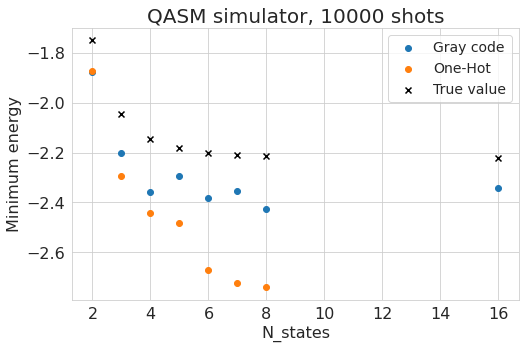

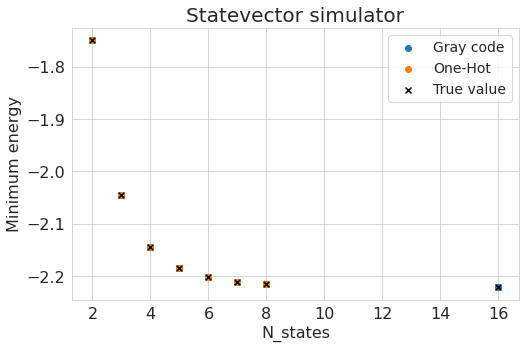

In [7]:
colours ={"Gray code" : "tab:blue", 
          "One-Hot" : "tab:orange"}

for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        data = encoding_group.groupby(['n_states'])['energy'].min()
        plt.scatter(x=data.index.to_numpy(), y=data.to_numpy(), marker='o', 
                 label=encoding_key, color=colours[encoding_key])
    
    plt.scatter(x=diagonalized_values[:,0], y=diagonalized_values[:, 1], marker='x', color='black', label='True value')
    
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Minimum energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    #plt.savefig(f'Minimium-energy-{title_string}.pdf')
    plt.show()

## Average energies

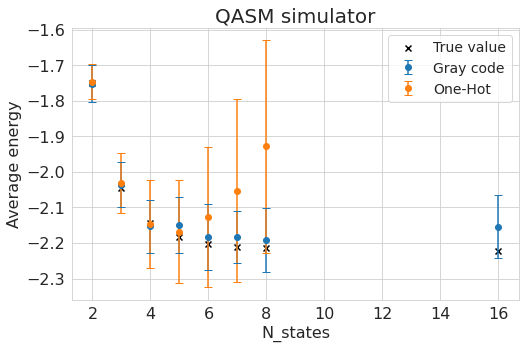

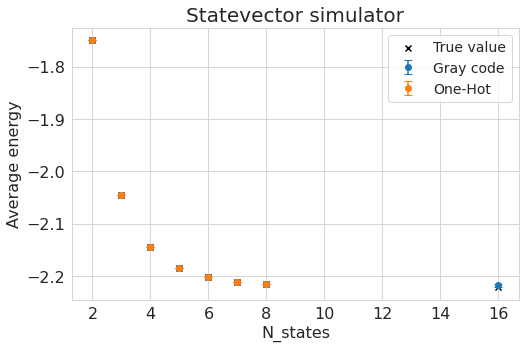

In [8]:
for key, grp in df.groupby(['sim_type']):
    
    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        split_by_state = encoding_group.groupby(['n_states'])
        n_states = split_by_state.groups.keys()
        means = split_by_state['energy'].mean()
        std = split_by_state['energy'].std()
        plt.errorbar(n_states, means, yerr=std, capsize=4, fmt='o', label=encoding_key, color=colours[encoding_key])
        
    plt.scatter(x=diagonalized_values[:,0], y=diagonalized_values[:, 1], marker='x', color='black', label='True value')
    
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Average energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key[0] == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    #plt.savefig(f'Average-energy-{title_string}.pdf')
    plt.show()

## Variance

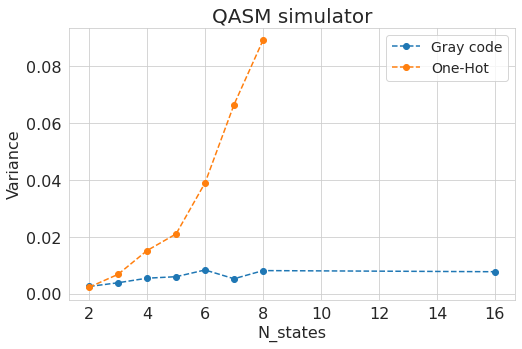

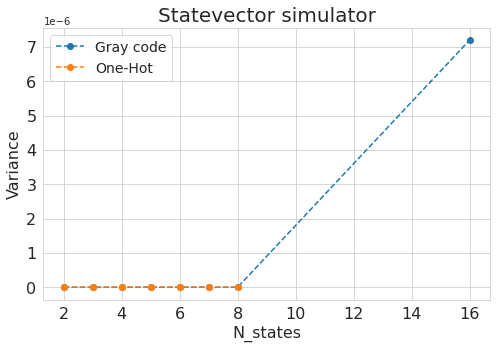

In [9]:
for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        plt.plot(encoding_group.groupby(['n_states'])['energy'].var(), linestyle='--', marker='o', label=encoding_key)
        
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Variance", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key[0] == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    plt.show()

## Paper plots

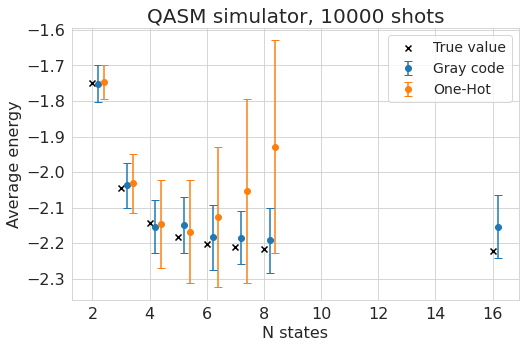

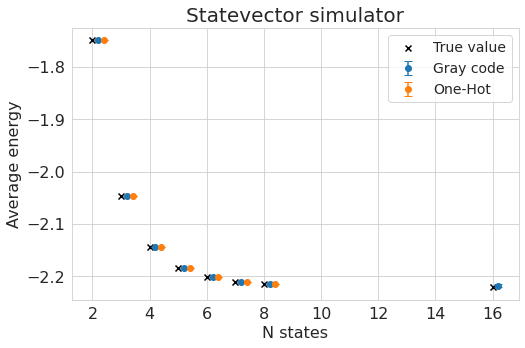

In [10]:
for key, grp in df.groupby(['sim_type']):
    
    plt.figure(figsize=(8, 5))
         
    plt.scatter(x=diagonalized_values[:,0], y=diagonalized_values[:, 1], marker='x', color='black', label='True value')
    
    count = 1
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        split_by_state = encoding_group.groupby(['n_states'])
        n_states = np.array(list(split_by_state.groups.keys()))
        means = split_by_state['energy'].mean()
        std = split_by_state['energy'].std()
        plt.errorbar(n_states + 0.2*count, means, yerr=std, capsize=4, fmt='o', label=encoding_key, color=colours[encoding_key])
        count += 1
        
    plt.xlabel("N states", fontsize=16)
    plt.ylabel("Average energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    
    if key == 'QASM':
        plt.savefig(f'nonoise-qasm-avgenergy.pdf')
        
    plt.show()

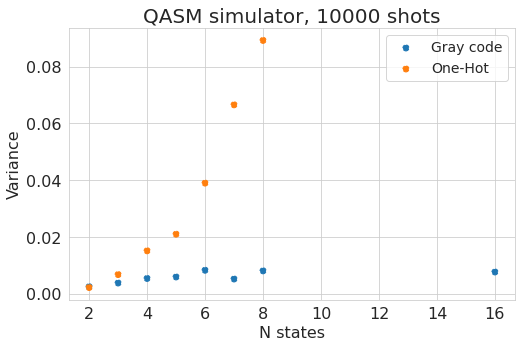

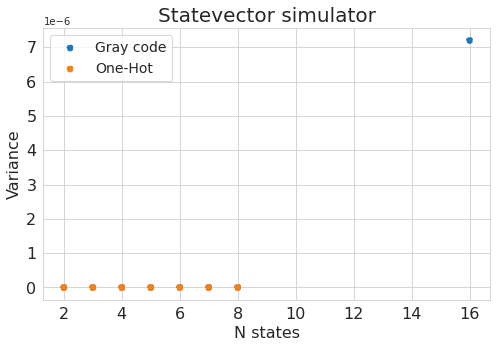

In [11]:
for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):        
        split_by_state = encoding_group.groupby(['n_states'])
        n_states = np.array(list(split_by_state.groups.keys()))
        plt.scatter(n_states, split_by_state['energy'].var(), linestyle='--', marker='o', label=encoding_key)
        
    plt.xlabel("N states", fontsize=16)
    plt.ylabel("Variance", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    title_string = f"{key} simulator"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    
    if key == 'QASM':
        plt.savefig("nonoise-qasm-variance.pdf")
    
    plt.show()

## Energy distribution

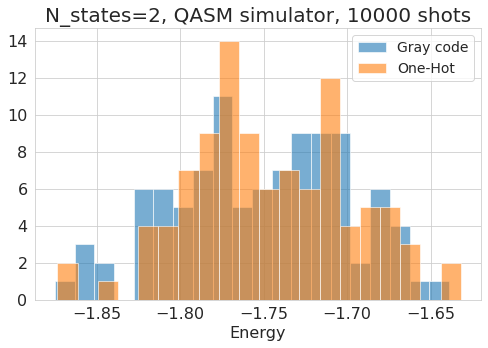

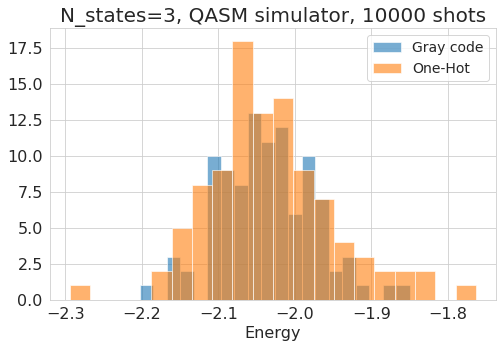

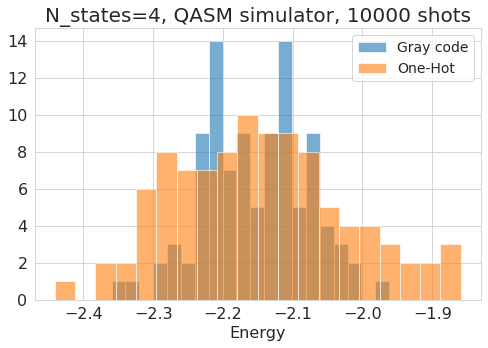

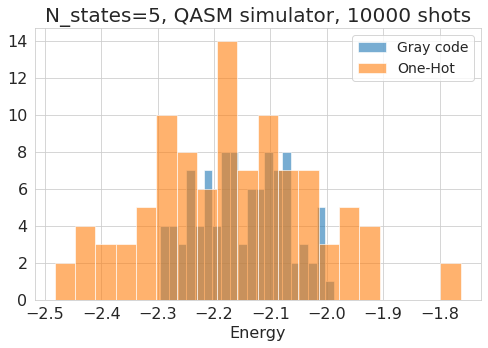

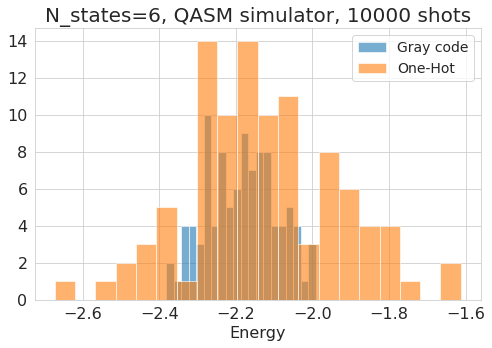

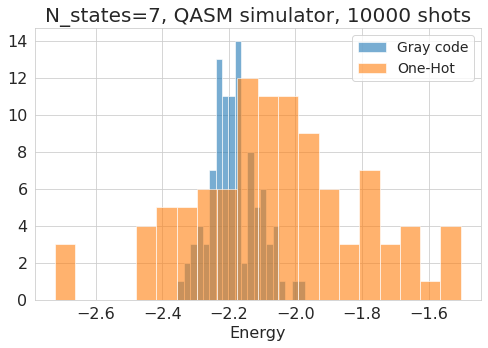

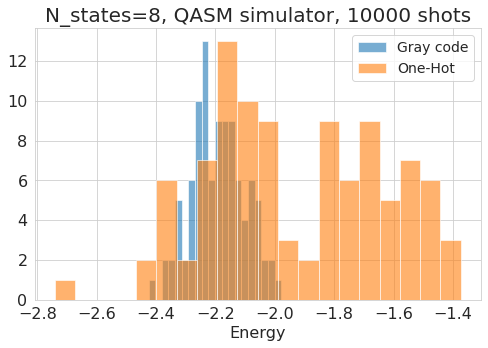

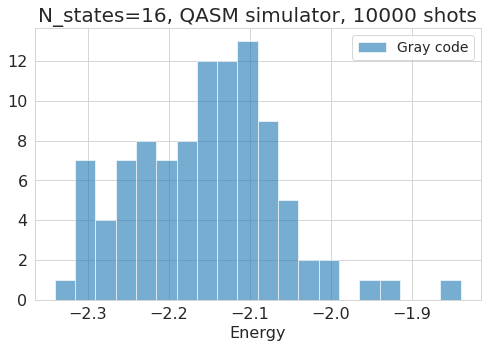

In [12]:
for key, grp in df.groupby(['sim_type', 'n_states']):
    if key[0] == 'Statevector':
        continue
    
    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        #rint(encoding_group['energy'])
        plt.hist(encoding_group['energy'], alpha=0.6, bins = 20, label=encoding_key)
    
    plt.legend(fontsize=14)    
    
    plt.xlabel("Energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    title_string = f"N_states={key[-1]}, "
    if key[0] == 'Statevector':
        title_string += 'statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    
    #plt.savefig(f"{''.join(title_string)}.pdf")
    plt.show()
    

## Boxplots

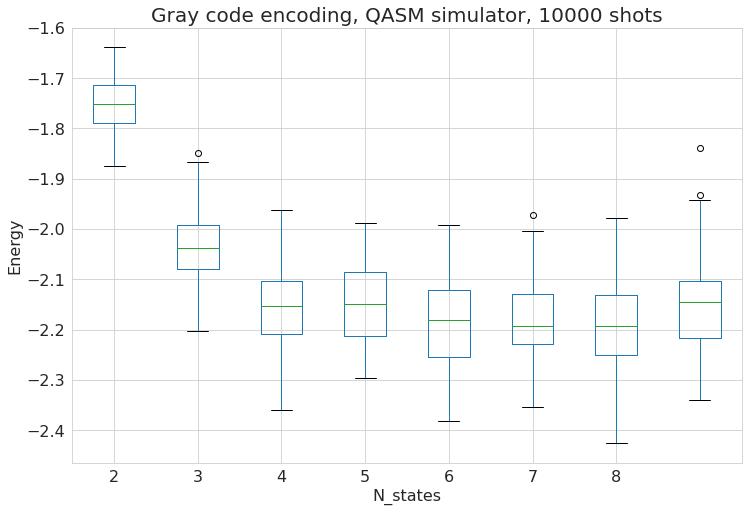

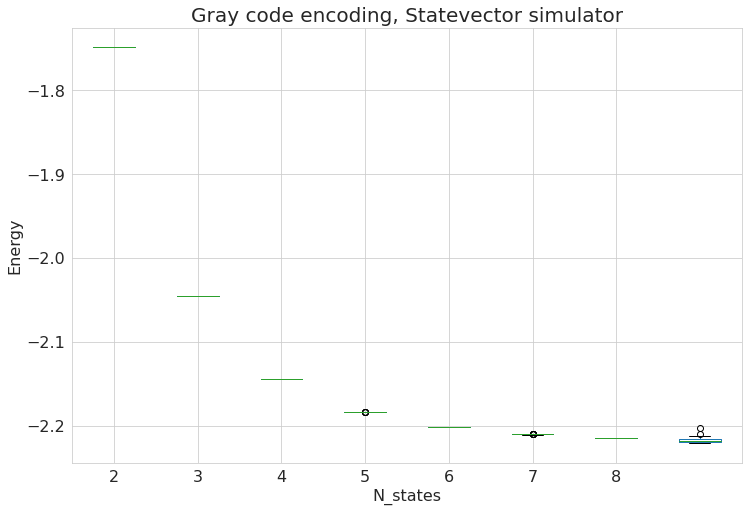

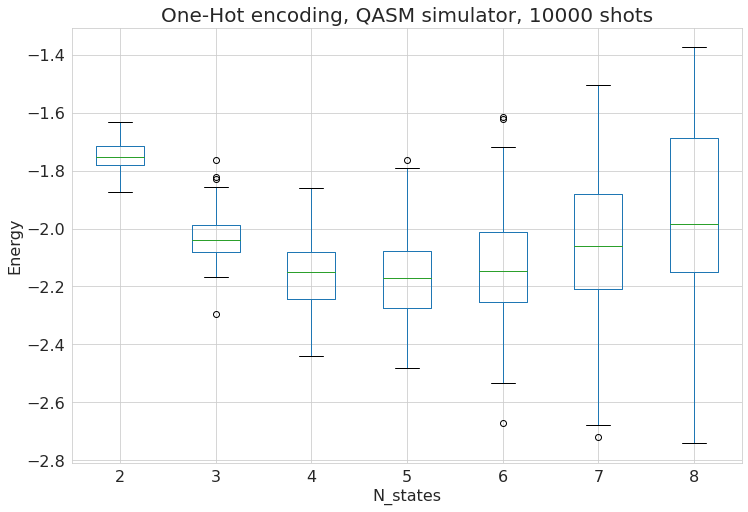

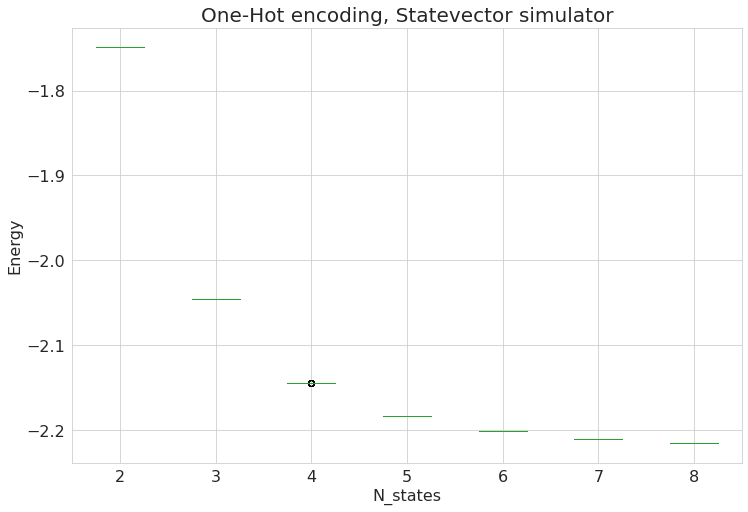

In [13]:
for key, grp in df.groupby(['enc_type', 'sim_type']):
    
    grp.groupby('n_states').boxplot(['energy'], figsize=(12, 8), fontsize=16)
    plt.title(key)
    
    if key[0] == 'dense':
        plt.xticks(range(1, 9), labels=(list(range(2, 9)) + [16]))
    else:
        plt.xticks(range(1, 8), labels=range(2, 9))
    
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Energy", fontsize=16)
    
    title_string = f"{key[0]} encoding, "
    if key[1] == 'Statevector':
        title_string += 'Statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    plt.show()
    print()

## Compute the distance from true energy

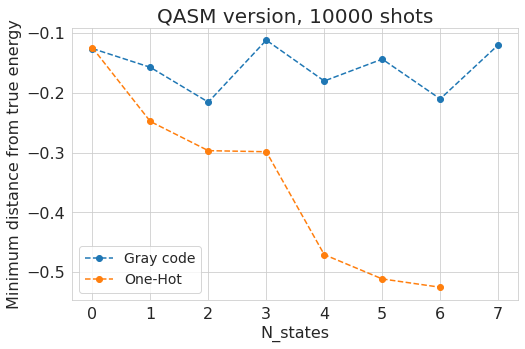

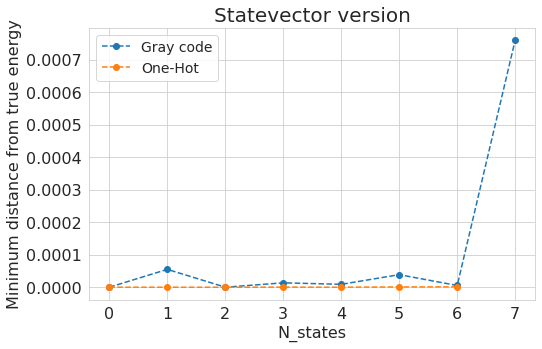

In [14]:
for key, grp in df.groupby(['sim_type']):

    plt.figure(figsize=(8, 5))
    
    for encoding_key, encoding_group in grp.groupby(['enc_type']):
        min_energies = encoding_group.groupby(['n_states']).agg({'energy' : np.min})
        min_energies.reset_index(inplace=True)
        plt.plot(min_energies['energy'].to_numpy() - diagonalized_values[:len(min_energies), 1], 
                 linestyle='--', marker='o', label=encoding_key)
        
    plt.xlabel("N_states", fontsize=16)
    plt.ylabel("Minimum distance from true energy", fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    
    title_string = f"{key} version"
    if key == 'QASM':
        title_string += f', 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.legend(fontsize=14)
    plt.show()

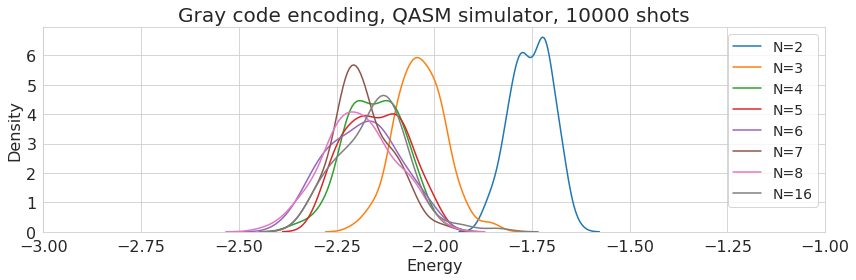

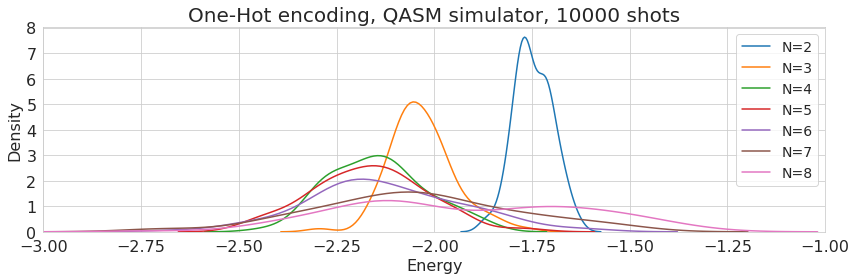

In [15]:
import seaborn as sns
sns.set_style('whitegrid')

for key, grp in df.groupby(['sim_type', 'enc_type']):
    if key[0] == 'Statevector':
        continue 
        
    plt.figure(figsize=(12, 4))
    
    for encoding_key, encoding_group in grp.groupby(['n_states']):
        sns.kdeplot(encoding_group['energy'], bw='scott', label=f"N={encoding_key}")
    
    plt.legend(fontsize=14)    
    
    plt.xlabel("Energy", fontsize=16)
    plt.ylabel("Density", fontsize=16)
    plt.xlim(-3, -1)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    title_string = f"{key[-1]} encoding, "
    if key[0] == 'Statevector':
        title_string += 'Statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.tight_layout()
    plt.savefig(f"{''.join(title_string)}.pdf")
    plt.show()
    

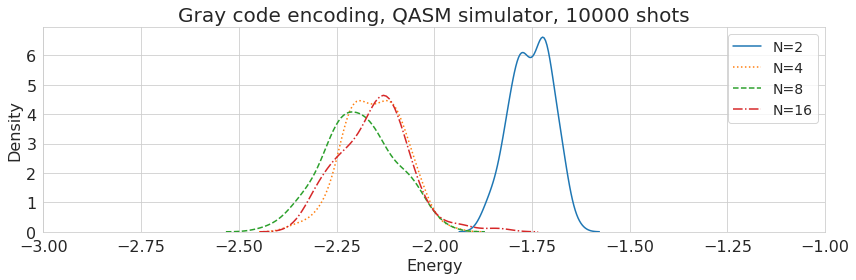

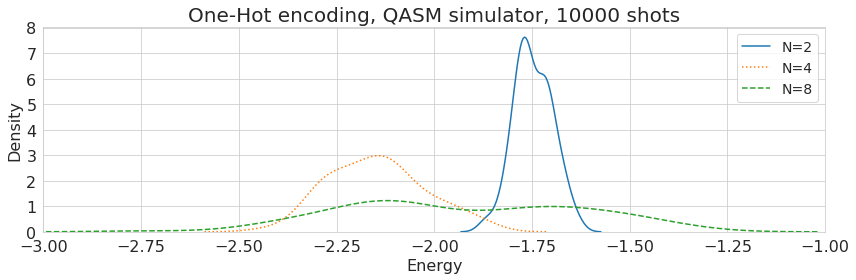

In [16]:
import seaborn as sns
sns.set_style('whitegrid')

linestyles = ['solid', 'dotted', 'dashed', 'dashdot']

for key, grp in df.groupby(['sim_type', 'enc_type']):
    if key[0] == 'Statevector':
        continue 
        
    plt.figure(figsize=(12, 4))
    
    count = 0
    for encoding_key, encoding_group in grp.groupby(['n_states']):
        if encoding_key in [2, 4, 8, 16]:
            sns.kdeplot(encoding_group['energy'], bw='scott', label=f"N={encoding_key}", linestyle=linestyles[count])
            count += 1
    
    plt.legend(fontsize=14)    
    
    plt.xlabel("Energy", fontsize=16)
    plt.ylabel("Density", fontsize=16)
    plt.xlim(-3, -1)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    title_string = f"{key[-1]} encoding, "
    if key[0] == 'Statevector':
        title_string += 'Statevector simulator'
    else:
        title_string += f'QASM simulator, 10000 shots'
    plt.title(title_string, fontsize=20)
    
    plt.tight_layout()
    plt.savefig(f"combined-kde-plot-{key[1]}.pdf")